In [359]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [333]:
data = pd.read_csv('Sales_prediction.csv')
data.head()

#Reading the csv file

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [334]:
data.shape

#Checking the shape of the data (rows and cols)

(200, 4)

In [335]:
data.isnull().sum()

#Checking if any values are null or cells are empty

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [336]:
data.dtypes

#Checking the data types for each of the columns

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [360]:
print(data.corr())
print ("Here we see TV seems to have the highest impact on total Sales!!!!")

#Tabulating the correlation between different values in the given dataset

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000
Here we see TV seems to have the highest impact on total Sales!!!!


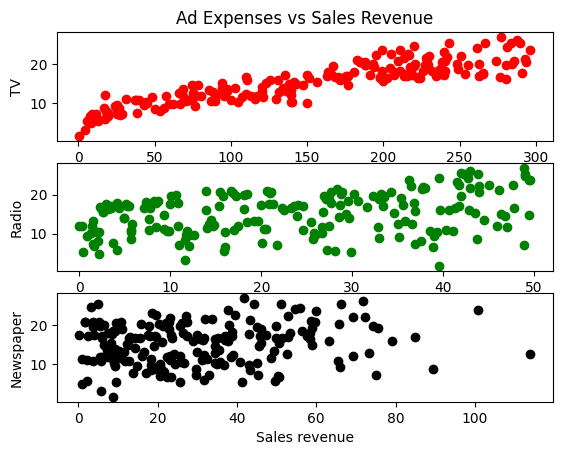

Here we see a much higher correlation between TV ad expenses and Sales Revenue!!!


In [338]:
fig, axes = plt.subplots(3)
ax = axes.ravel()
ax[0].set_title("Ad Expenses vs Sales Revenue")
ax[0].scatter(data['TV'], data['Sales'], color = 'red')
ax[0].set_ylabel("TV")
ax[1].scatter(data['Radio'], data['Sales'], color = 'green')
ax[1].set_ylabel("Radio")
ax[2].scatter(data['Newspaper'], data['Sales'], color = 'black')
ax[2].set_xlabel("Sales revenue")
ax[2].set_ylabel("Newspaper")
plt.show()
print("Here we see a much higher correlation between TV ad expenses and Sales Revenue!!!")

In [339]:
#Need to extract data for model training and validiating
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print (x[:5])
print (y[:5])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
[22.1 10.4 12.  16.5 17.9]


In [340]:
print("The shape of input vector is:: ",x.shape)
print ("the shape of output vector is:: ", y.shape)

#Checking correct shapes for the input and output vectors 

The shape of input vector is::  (200, 3)
the shape of output vector is::  (200,)


{'whiskers': [<matplotlib.lines.Line2D at 0x2c2713d1650>,
 'caps': [<matplotlib.lines.Line2D at 0x2c2713d1290>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c2713d1710>],
 'medians': [<matplotlib.lines.Line2D at 0x2c2713d3dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c2713d1250>],
 'means': []}

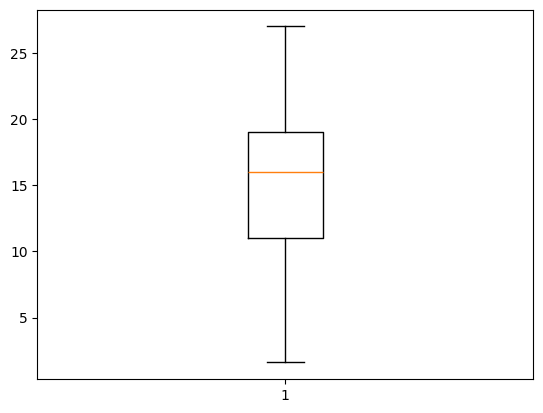

In [341]:
plt.boxplot(data['Sales'] )

#Seeing if there are any outliers, so that we can adjust for them

In [342]:
x_input, x_test, y_input, y_test = train_test_split(x, y, test_size=0.1)
x_train, x_val, y_train, y_val= train_test_split(x_input, y_input, test_size=0.1)
print("The shape of training input vector is:: ",x_train.shape)
print ("the shape of testing input vector is:: ", x_test.shape)

#Again checking the shape of the input vectors to properly design the model

The shape of training input vector is::  (162, 3)
the shape of testing input vector is::  (20, 3)


In [351]:
input_to_model = Input(shape = (3,))
y  = tf.keras.layers.Dense(256, activation = 'relu')(input_to_model)
y = tf.keras.layers.Dense(128, activation = 'relu')(y)
y = tf.keras.layers.Dense(64, activation = 'relu')(y)
y = tf.keras.layers.Dense(32, activation = 'relu')(y)
output_value = tf.keras.layers.Dense(1)(y)
#Defining the model layers

optimizer = Adam(learning_rate=0.01)
model = Model(inputs = [input_to_model], outputs = output_value)
model.summary()
#Checking the model parameters

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_170 (Dense)           (None, 256)               1024      
                                                                 
 dense_171 (Dense)           (None, 128)               32896     
                                                                 
 dense_172 (Dense)           (None, 64)                8256      
                                                                 
 dense_173 (Dense)           (None, 32)                2080      
                                                                 
 dense_174 (Dense)           (None, 1)                 33        
                                                                 
Total params: 44289 (173.00 KB)
Trainable params: 44289 (1

In [352]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error')
#Compiling the model using mean squared error as the loss function, and Adam optimizer

In [361]:
history = model.fit([x_train], y_train,  epochs = 200, validation_data=([x_val], y_val))
#Training the model!

Epoch 1/200
1/6 [====>.........................] - ETA: 0s - loss: 2.5406

6/6 [==============================] - 0s 12ms/step - loss: 2.4446 - val_loss: 1.9026
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 2.7472 - val_loss: 1.2475
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 2.1375 - val_loss: 1.0697
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 2.0512 - val_loss: 1.1246
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 1.9495 - val_loss: 1.0552
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 1.9160 - val_loss: 1.2591
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 2.2415 - val_loss: 1.2742
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 1.9671 - val_loss: 1.6553
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 3.2533 - val_loss: 2.1361
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 2.2556 - val_loss: 1.8155
Epoch 11/200
6/6 [======================

In [362]:
prediction_dense = model.predict([x_test])
prediction_sales_dense = np.concatenate([prediction_dense.reshape(-1,1), y_test.reshape(-1,1)], axis = 1)
#Using the model for prediction
#Concatenating the output in a more observable format

1/1 [==============================] - 0s 21ms/step


In [363]:
def calc_loss(prediction_sales):
    loss = 0
    actual = np.sum(prediction_sales, axis = 0)[-1]
    for i in range (len(prediction_sales)):
        loss += abs(prediction_sales[i][0] - prediction_sales[i][-1])
    percentage_loss = loss/(actual)*100
    print ("The loss percentage is: ", percentage_loss, "% !")
#Defining a function to calculate loss using the predicted values and test dataset values


In [364]:
#Using RandomForest to see how this methods performs!
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [365]:
predictions_rf = rf.predict(x_test)
prediction_sales_rf = np.concatenate([predictions_rf.reshape(-1,1), y_test.reshape(-1,1)], axis = 1)

#Testing the RF model on the testing dataset

In [366]:
#Calculating loss for both methods
print ("Using Dense Layers:: ")
calc_loss(prediction_sales_dense)
print ("Useing Random Forest:: ")
calc_loss (prediction_sales_rf)

Using Dense Layers:: 
The loss percentage is:  7.447076708837962 % !
Useing Random Forest:: 
The loss percentage is:  5.032683658170883 % !


In [378]:
overall_out = np.concatenate([prediction_sales_dense, prediction_sales_rf], axis = 1)
df_out = pd.DataFrame(overall_out, columns = ['Dense Pred', 'Actual', 'RF Pred', 'Actual'])
df_out.to_csv('Prediction_Sales.csv')
df_out.head()

,Dense Pred,Actual,RF Pred,Actual
0,19.175568,18.0,18.220,18.0
1,12.985270,11.0,12.520,11.0
2,12.253967,11.6,11.294,11.6
3,20.351013,23.7,22.712,23.7
4,15.341379,15.6,16.635,15.6
